# Exploratory data analysis

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import calendar
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.style.use('seaborn-dark-palette')

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2})


In [2]:
from html2image import Html2Image

def save_table_as_pic(df, name):
    dict_data = [df.to_dict(), df.to_dict('index')]
    htmldf = '<!DOCTYPE HTML><html><head><meta http-equiv="Content-Type" content="text/html; charset=utf-8"></head><body>'

    htmldf = htmldf + '<table  width="auto" ><tr>'

    for key in dict_data[0].keys():
        htmldf = htmldf + '<th class="header" height="30px" style="font-weight: bold; background-color: #C0C9CC; padding: 15px;">' + key + '</th>'

    htmldf = htmldf + '</tr>'

    for key in dict_data[1].keys():
        htmldf = htmldf + '<tr height="30px"'
        htmldf = htmldf + 'style="padding: 5px;" >' if key % 2 == 0 else htmldf + 'style="background-color: #F2F1F0; padding: 5px;">'
        for subkey in dict_data[1][key]:
            htmldf = htmldf + '<td style="padding: 5px;">' + str(dict_data[1][key][subkey]) + '</td>'
        htmldf = htmldf + '</tr>'
    htmldf = htmldf + '</tr>'
    htmldf = htmldf + '</tr></table></body></html>'

    with open(name+'.html','wb') as f:
        f.write(htmldf.encode("utf-8"))
    

# Read the data


In [29]:
df = pd.read_csv('data/dataset.csv', low_memory=False).fillna(0)
df['Installation_number'] = df['Installation_number'].astype(int)
df["Date"] = df["Year"].astype(str) + "/" + df["Month"].astype(str)
df["Date"] = pd.to_datetime(df["Date"], format='%Y/%m/%d')
df.head()

,Year,Month,Consumer_number,Consumer_type,Installation_zone,Consumption,Installation_number,Date
0,2013,1,21018,1,4,0,0,2013-01-01
1,2013,1,36690,2,6,5,0,2013-01-01
2,2013,1,17940,1,6,6,0,2013-01-01
3,2013,1,14273,1,6,1,0,2013-01-01
4,2013,1,5,1,6,13,0,2013-01-01


In [9]:
cons_types = pd.read_csv('data/consumer_types.csv')
cons_types.head()

,Consumer_type,Name
0,1,DOMÉSTICO
1,2,COM/INDUSTRIAL/OBRAS
2,3,UTIL.PUBLICA
3,4,OBRAS
4,5,ESTADO


In [12]:
cons = df.drop(columns=['Year', 'Month', 'Consumer_number', 'Installation_zone', 'Installation_number']).groupby(['Consumer_type'], as_index=False).sum()
cons = pd.merge(cons_types, cons, left_on='Consumer_type', right_on='Consumer_type', how='inner')
cons = cons.sort_values('Consumption', ascending=False).drop(columns=['Consumer_type']).rename(columns={'Name':'Consumer_type'})
cons = cons[cons['Consumer_type'] != 'CP.DOM/RURAL'].reset_index().drop(columns=['index'])
cons.head()

,Consumer_type,Consumption
0,DOMÉSTICO,1662340
1,RURAL DOMÉSTICO,328654
2,COM/INDUSTRIAL/OBRAS,264360
3,UTIL.PUBLICA,151623
4,ESTADO,133371


In [328]:
save_table_as_pic(cons, 'the_highest_cons_by_cons_types')

In [14]:
print('Len:', len(df))
print('Unique consumers:', df['Consumer_number'].nunique())
print('Unique types:', df['Consumer_type'].nunique())
print('Unique zone:', df['Installation_zone'].nunique())
print('Unique installation_number:', df['Installation_number'].nunique())

Len: 352944
Unique consumers: 29692
Unique types: 19
Unique zone: 49
Unique installation_number: 21509


# Yearly comparing of the consumption for different consumers 

In [15]:
years = [2013, 2014, 2016, 2017, 2018, 2019, 2020]
monthes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [31]:
by_ano = df.drop(columns=['Installation_zone', 'Installation_number'])
by_ano.head()

,Year,Month,Consumer_number,Consumer_type,Consumption,Date
0,2013,1,21018,1,0,2013-01-01
1,2013,1,36690,2,5,2013-01-01
2,2013,1,17940,1,6,2013-01-01
3,2013,1,14273,1,1,2013-01-01
4,2013,1,5,1,13,2013-01-01


In [32]:
nulled = []
for i in by_ano['Consumer_number'].unique():
    cons_i = by_ano[by_ano['Consumer_number'] == i]
    if (cons_i['Consumption'] == 0).all():
        nulled.append(i)
print(len(nulled))

2358


In [33]:
for i in nulled:
    by_ano = by_ano[by_ano['Consumer_number'] != i]
len(by_ano)

342602

In [19]:
# This is choosing consumers if there are values for all years and all months

# consumers = []
# for i in by_ano['Consumer_number'].unique():
#     cons_nulled = by_ano[by_ano['Consumer_number'] == i]
#     consumer_type = by_ano['Consumer_type'][0].item()

#     counter_year = 0
#     for j in years:
#         counter_month = 0
    
#         if j in cons_nulled['Year'].unique():
#             for k in monthes:
#                 if k in cons_nulled['Month'].unique():
#                         counter_month += 1
    
#             if counter_month == 12:
#                 counter_year += 1
        
#     if counter_year == 7:
#         consumers.append([i, consumer_type])

In [20]:
consumers = pd.DataFrame(consumers, columns = ['Consumer_number', 'Consumer_type'])
consumers.head()
# print(len(consumers))

,Consumer_number,Consumer_type
0,21056,1
1,115,1
2,14016,1
3,21195,1
4,21194,1


In [37]:
# Choose 40 different consumers

random_consumers = []
for i in range(51):
    random = by_ano['Consumer_number'].sample(1).item()
    tipo = by_ano[by_ano['Consumer_number'] == random]['Consumer_type'].sample(1).item()
    random_consumers.append([random, tipo])

random_consumers = pd.DataFrame(random_consumers, columns = ['Consumer_number', 'Consumer_type'])
random_consumers = pd.merge(random_consumers, cons_types, left_on='Consumer_type', right_on='Consumer_type', how='inner')
random_consumers

,Consumer_number,Consumer_type,Name
0,27497,1,DOMÉSTICO
1,51207,1,DOMÉSTICO
2,25289,1,DOMÉSTICO
3,52817,1,DOMÉSTICO
4,14820,1,DOMÉSTICO
5,1550,1,DOMÉSTICO
6,3684,1,DOMÉSTICO
7,37141,1,DOMÉSTICO
8,51119,1,DOMÉSTICO
9,9484,1,DOMÉSTICO


In [24]:
colors = ['#3d348b', '#7678ed', '#f7b801', '#4361ee', '#4cc9f0',
          '#db00b6', '#38b000', '#c1d3fe', '#9053D7', '#f20089',
          '#9b5de5', '#f15bb5', '#fee440', '#00bbf9', '#00f5d4',   
          '#66FC6E', '#BAFF24', '#F9FF55', '#FFA23F', '#9d4edd',]

# Draw with fix year 

16
16
16
16
16
17
18


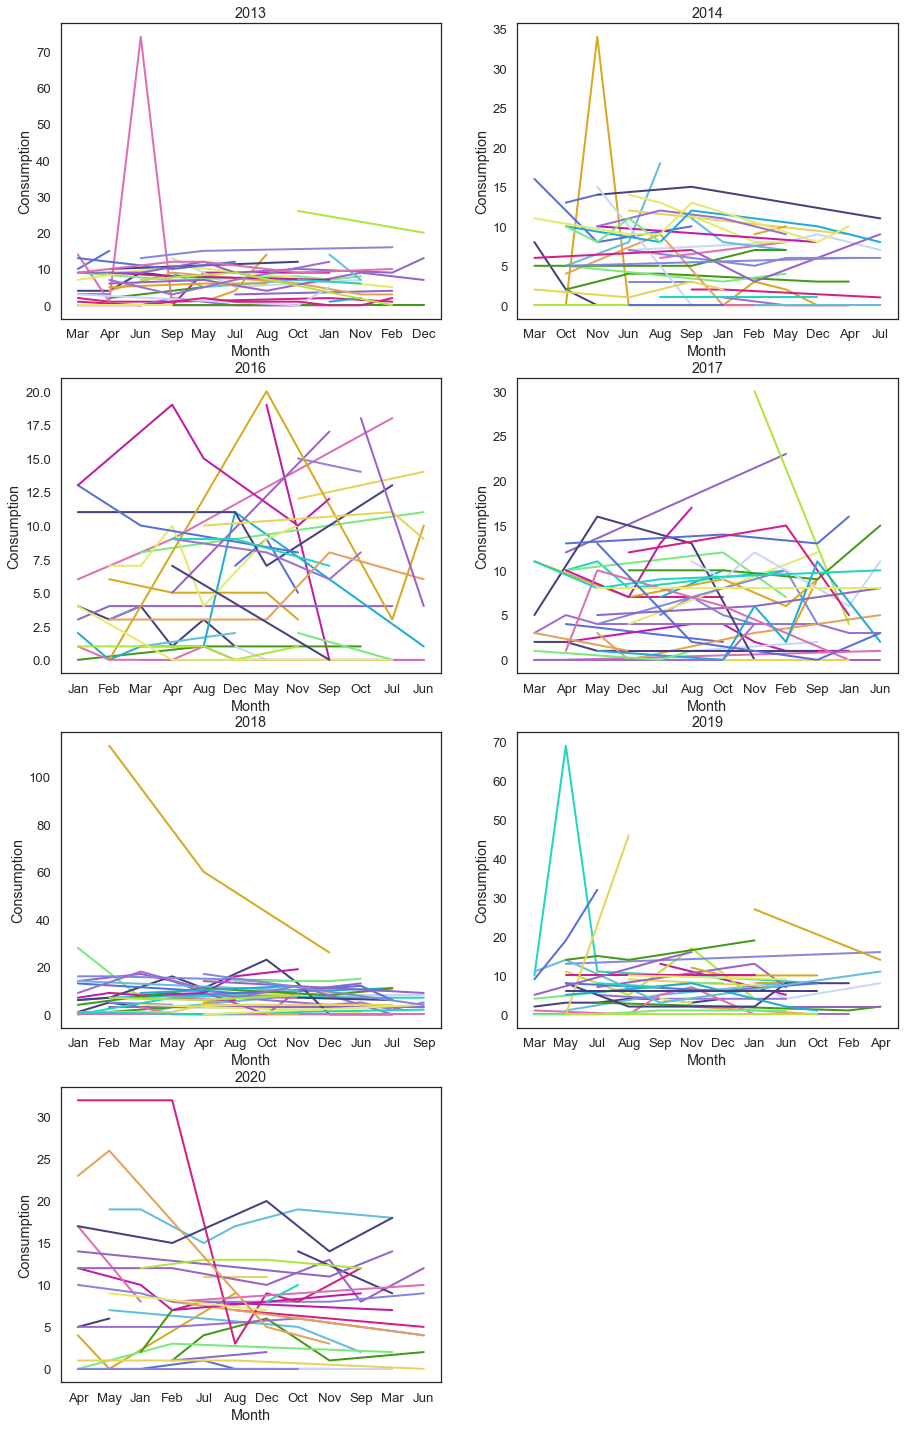

In [53]:
# sns.set_style("white")
# sns.set_palette(colors, 20, .75)
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(15, 25))

for i, ax in zip(years, axes.flat): 
    ano_i = by_ano[by_ano['Year'] == i].drop(columns=['Year'])
    print(ano_i['Consumer_type'].nunique())
    ano_i.to_csv('data/superset/random_consumers_' + str(i) + '.csv', index=False)
    for x in random_consumers['Consumer_number']:
        
        current = ano_i.loc[ano_i['Consumer_number'] == x].drop(columns=['Consumer_number'])
        current['Month'] = current['Month'].apply(lambda x: calendar.month_abbr[x])
        

        sns.lineplot(data=current, x='Month', y = 'Consumption', ax = ax).set(title = i)
fig.delaxes(axes.flatten()[7])
plt.savefig("charts/exploratory analysis/random consumers.png") 
plt.show()



# Draw with fix numero de consumidor

In [41]:
by_consumidor = by_ano.copy()
by_consumidor

,Year,Month,Consumer_number,Consumer_type,Consumption,Date
0,2013,1,21018,1,0,2013-01-01
1,2013,1,36690,2,5,2013-01-01
2,2013,1,17940,1,6,2013-01-01
3,2013,1,14273,1,1,2013-01-01
4,2013,1,5,1,13,2013-01-01
...,...,...,...,...,...,...
352922,2020,12,57155,1,11,2020-12-01
352923,2020,12,57156,1,1,2020-12-01
352928,2020,12,57266,1,5,2020-12-01
352929,2020,12,57271,1,1,2020-12-01


In [42]:
cons_by_tipo = {23230: 'COM/INDUSTRIAL/OBRAS', 34017: 'RURAL DOMÉSTICO', 18282: 'DOMÉSTICO', 6938: 'ESTADO', 6706: 'UTIL.PUBLICA'}
consumers = [23230, 34017, 18282, 6938, 6706]

In [43]:
# consumer = by_consumidor[by_consumidor['Consumer_number'] == 23230].drop(columns=['Consumer_number', 'Consumer_type'])
# consumer

# for i in years:
#     cons_ano = consumer.loc[consumer['Year'] == i].drop(columns=['Year'])
#     cons_ano['Month'] = cons_ano['Month'].apply(lambda x: calendar.month_abbr[x])
#     sns.lineplot(data=cons_ano, x='Month', y = 'Consumption', label = i).set(title = 'COM/INDUSTRIAL/OBRAS')
# #     plt.savefig("charts/consumo_por_сonsumidor_" + cons_tipo + ".png") 

In [44]:
types = {2: 'COM/INDUSTRIAL/OBRAS', 9 : 'RURAL DOMÉSTICO', 1 : 'DOMÉSTICO', 5 : 'ESTADO', 3 : 'UTIL.PUBLICA'}

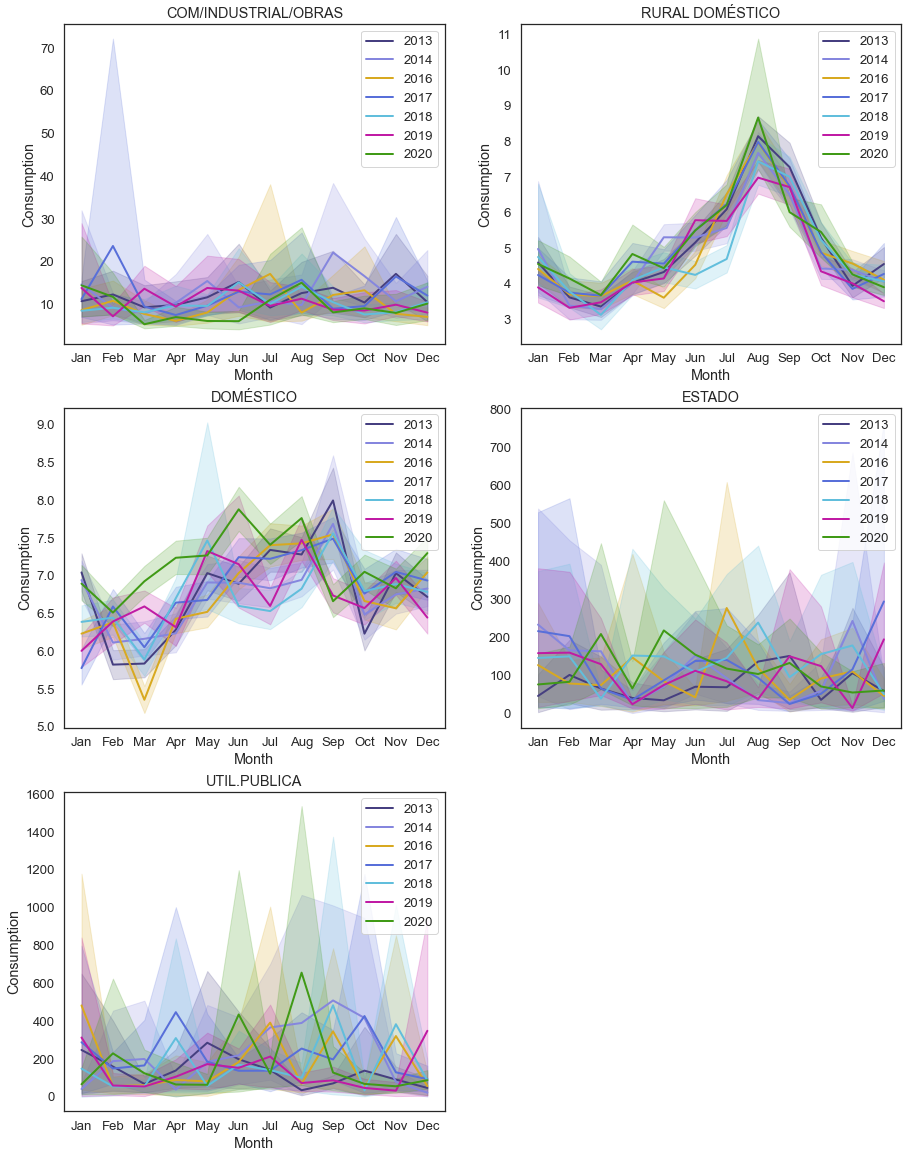

In [51]:
sns.set_style("white")
sns.set_palette(colors, 20, .75)


fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15, 20))
for j, ax in zip(types, axes.flat):
    cons = df[df['Consumer_type'] == j].drop(columns=['Consumer_type', 'Installation_zone', 'Installation_number', 'Consumer_number']) 
    cons['Month'] = cons['Month'].apply(lambda x: calendar.month_abbr[x])
    cons.to_csv('data/superset/random_consumers_type_' + str(j) + '.csv', index=False)
    consumer_type = types.get(j)
    
    for i in years:
        cons_ano = cons.loc[cons['Year'] == i].drop(columns=['Year'])
        
        sns.lineplot(data=cons_ano, x='Month', y = 'Consumption', ax = ax, legend='brief', label=str(i)).set(title = consumer_type)
fig.delaxes(axes.flatten()[5])
plt.savefig("charts/exploratory analysis/consumption_por_сonsumidor.png")
plt.show()



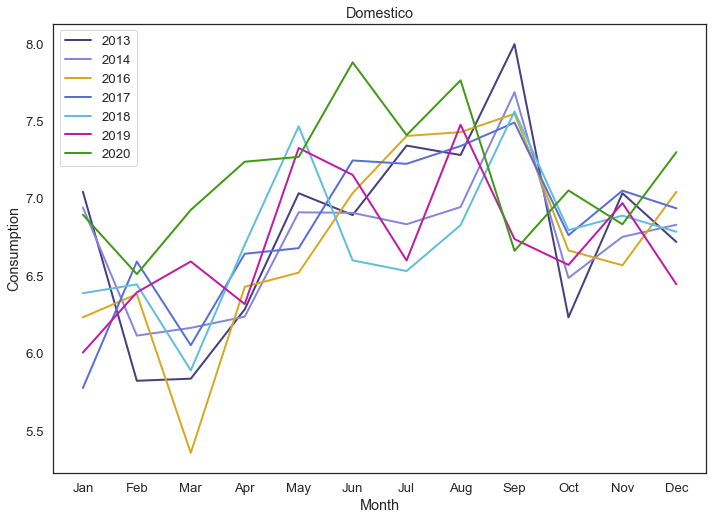

In [400]:
domestico = df[df['Consumer_type'] == 1].drop(columns=['Consumer_type', 'Consumer_number']) 
for i in years_list:
    domestico_ano = domestico.loc[domestico['Year'] == i].drop(columns=['Year'])
    domestico_mes = domestico_ano.groupby('Month', as_index=False).aggregate({'Consumption':'mean'})
#     print(domestico_mes)
    domestico_mes['Month'] = domestico_mes['Month'].apply(lambda x: calendar.month_abbr[x])
    sns.lineplot(data=domestico_mes, x='Month', y = 'Consumption', legend='brief', label=str(i)).set(title = 'Domestico')
plt.show()


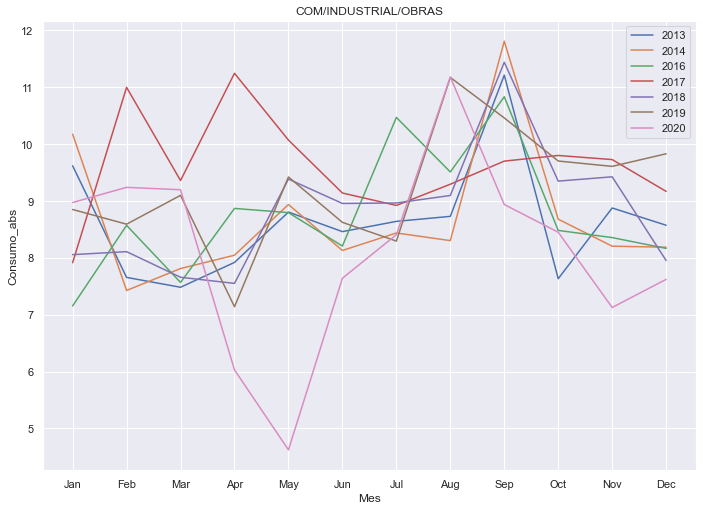

In [105]:
indust = df[df['Consumer_type'] == 2].drop(columns=['Consumer_type', 'Cons_numero'])
for i in years_list:
    indust_ano = indust.loc[indust['Ano'] == i].drop(columns=['Ano'])
    indust_mes = indust_ano.groupby('Mes', as_index=False).aggregate({'Consumo_abs':'mean'})

    indust_mes['Mes'] = indust_mes['Mes'].apply(lambda x: calendar.month_abbr[x])
    sns.lineplot(data=indust_mes, x='Mes', y = 'Consumo_abs', legend='brief', label=str(i)).set(title = 'COM/INDUSTRIAL/OBRAS')
plt.show()

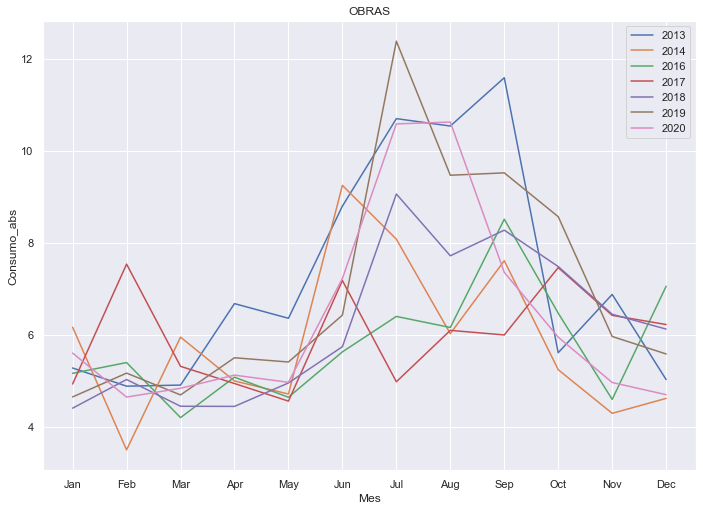

In [107]:
obras = df[df['Consumer_type'] == 4].drop(columns=['Consumer_type', 'Cons_numero'])
for i in years_list:
    obras_ano = obras.loc[obras['Ano'] == i].drop(columns=['Ano'])
    obras_mes = obras_ano.groupby('Mes', as_index=False).aggregate({'Consumo_abs':'mean'})
    obras_mes['Mes'] = obras_mes['Mes'].apply(lambda x: calendar.month_abbr[x])
    sns.lineplot(data=obras_mes, x='Mes', y = 'Consumo_abs', legend='brief', label=str(i)).set(title = 'OBRAS')
plt.show()

# Task is to identify profiles in globals years consumption, independently from tipo de consumidor

In [125]:
obras = df[df['Cons_tipo'] == 4].drop(columns=['Cons_tipo', 'Cons_numero'])
obras = obras.groupby(['Ano', 'Mes'], as_index=False).aggregate({'Consumo_abs':'mean'})
obras

,Ano,Mes,Consumo_abs
0,2013,1,5.274510
1,2013,2,4.879195
2,2013,3,4.902778
3,2013,4,6.676056
4,2013,5,6.356643
...,...,...,...
79,2020,8,10.627907
80,2020,9,7.357798
81,2020,10,5.945205
82,2020,11,4.958904


# Checking the average value

In [117]:
obras_ano = obras.loc[obras['Ano'] == 2013].drop(columns=['Ano'])
obras_mes = obras_ano.loc[obras_ano['Mes'] == 1].drop(columns=['Mes'])
obras_mes

,Consumo_abs
33,16
56,0
102,0
109,12
138,3
...,...
25438,5
25439,0
25454,6
25458,0


In [124]:
summa = 0
for i in obras_mes['Consumo_abs']:
    summa += i

av = summa / len(obras_mes)
av

5.2745098039215685